### Zadanie 13 z sekcji 3.7 (ISL)

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to $1$ prior to starting part **(a)** to ensure consistent results.

In [1]:
import random
random.seed(1)

**(a)** Using the `normal()` method of your random number generator, create a vector `x`, containing 100 observations drawn from a
$N(0, 1)$ distribution. This represents a feature, $X$.

In [19]:
x = [random.normalvariate(0, 1) for _ in range(100)]
print(x[:5])

[-1.4737512219218045, 0.6874401428559267, -0.596153245286779, 1.0539313914844752, -0.5602422040055073]


**(b)** Using the `normal()` method, create a vector, `eps`, containing $100$ observations drawn from a $N(0, 0.25)$ distribution-a normal distribution with mean zero and variance $0.25$.

In [20]:
eps = [random.normalvariate(0, 0.5) for _ in range(100)]
print(eps[:5])

[-0.1240264933935079, -0.9647031133164793, -0.7255931649919265, 0.46073580555539245, -0.42514504742507625]


**(c)** Using `x` and `eps`, generate a vector `y` according to the model
$$
Y = −1 + 0.5X + \epsilon
$$
What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

In [21]:
y = [-1.0 + 0.5 * x_i + eps_i for x_i, eps_i in zip(x, eps)]
print(y[:5])

[-1.86090210435441, -1.620983041888516, -2.023669787635316, -0.012298498702369931, -1.7052661494278298]


**(d)** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

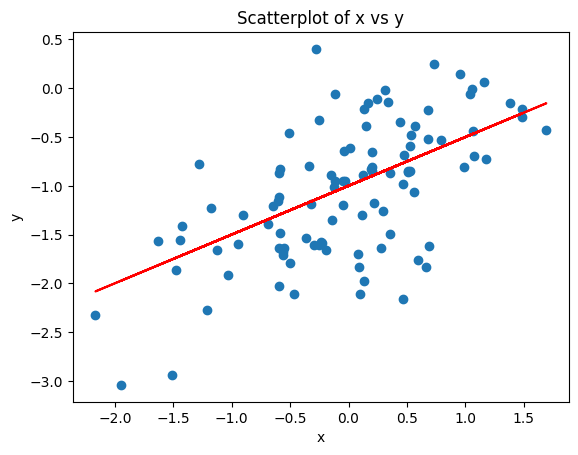

In [ ]:
import matplotlib.pyplot as plt

# plot population regression line (Real relationship between x and y without noise (eps) )
fx = [-1.0 + 0.5 * x_i for x_i in x]
plt.plot(x, fx, color='red')

plt.scatter(x, y)
plt.xlabel('x')
# plt.xlim(-2.5, 2.5)
plt.ylabel('y')
# plt.ylim(-3.5, 3.5)
plt.title('Scatterplot of x vs y')
plt.show()

**(e)** Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $β_0$ and $β_1$ ?

In [ ]:
import statsmodels.api as sm

# Add a constant to the x values for β0
x_with_const = sm.add_constant(x)
print(x_with_const[:5])

# Fit the model
model = sm.OLS(y, x_with_const)
# model = sm.OLS(y, x)
model = model.fit()

# Print the summary of the model
print(model.summary())

# Extract the coefficients
beta_0_hat = model.params[0]
beta_1_hat = model.params[1]

print(f"Estimated coefficients: β0 = {beta_0_hat}, β1 = {beta_1_hat}")

[[ 1.         -1.47375122]
 [ 1.          0.68744014]
 [ 1.         -0.59615325]
 [ 1.          1.05393139]
 [ 1.         -0.5602422 ]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     60.93
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           6.58e-12
Time:                        12:13:09   Log-Likelihood:                -81.475
No. Observations:                 100   AIC:                             166.9
Df Residuals:                      98   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

**(f)** Display the least squares line on the scatterplot obtained in **(d)**. Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

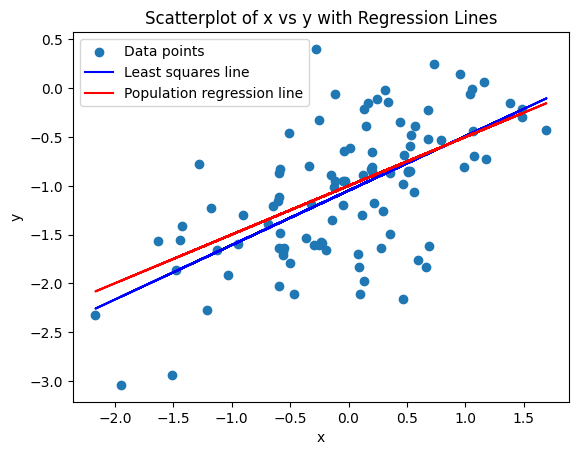

In [38]:
# Plot the scatterplot of x vs y
plt.scatter(x, y, label='Data points')

y_hat = [beta_0_hat + beta_1_hat * x_i for x_i in x]
assert(all(y_hat) == all(model.fittedvalues))

# Plot the least squares line
plt.plot(x, model.fittedvalues, color='blue', label='Least squares line')

# Plot the population regression line
plt.plot(x, fx, color='red', label='Population regression line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y with Regression Lines')
plt.legend()
plt.show()

**(g)** Now fit a polynomial regression model that predicts `y` using `x` and `x^2` . Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [44]:
import numpy as np

# Create the quadratic term
x_squared = np.square(x)

# Combine x and x_squared into a single dataframe
X_poly = np.column_stack((x, x_squared))
X_poly_with_const = sm.add_constant(X_poly)
print(X_poly_with_const[:5])

[[ 1.         -1.47375122  2.17194266]
 [ 1.          0.68744014  0.47257395]
 [ 1.         -0.59615325  0.35539869]
 [ 1.          1.05393139  1.11077138]
 [ 1.         -0.5602422   0.31387133]]


In [45]:
# Fit the polynomial regression model
poly_model = sm.OLS(y, X_poly_with_const).fit()

# Print the summary of the polynomial model
print(poly_model.summary())

# Compare the R-squared values of the linear and polynomial models
print(f"Linear model R-squared: {model.rsquared}")
print(f"Polynomial model R-squared: {poly_model.rsquared}")

# Check if the quadratic term is significant
print(f"P-value for the quadratic term: {poly_model.pvalues[2]}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     30.39
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           5.65e-11
Time:                        13:12:01   Log-Likelihood:                -81.322
No. Observations:                 100   AIC:                             168.6
Df Residuals:                      97   BIC:                             176.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0278      0.068    -15.091      0.0

**(h)** Repeat **(a)**–**(f)** after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term in **(b)**. Describe your results.

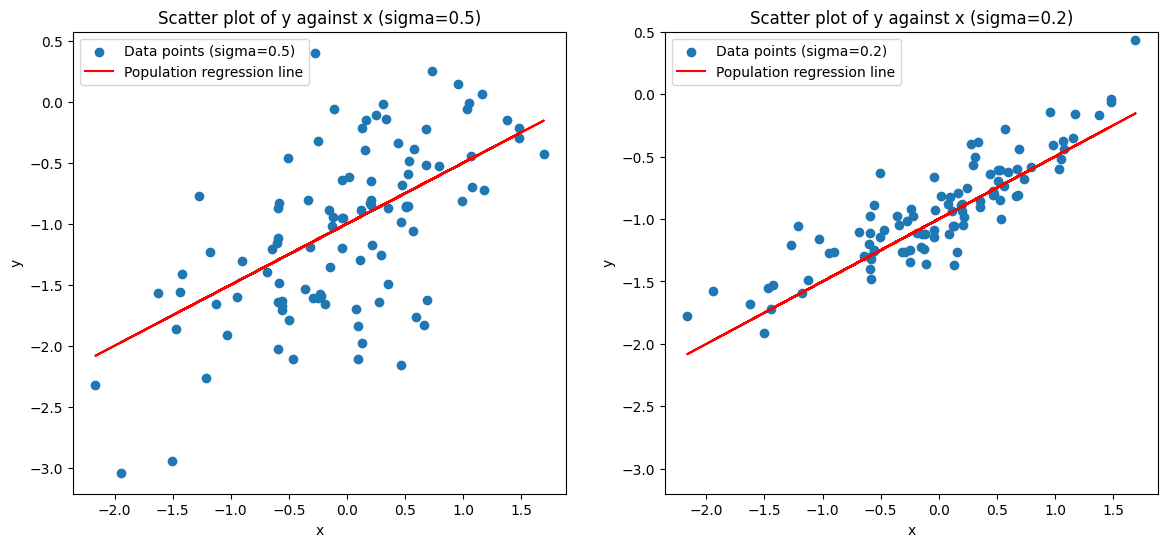

In [54]:
# (a) Generate x with 100 observations from N(0, 1)
# x_new = [random.normalvariate(0, 1) for _ in range(100)]
x_new = x

# (b) Generate eps with 100 observations from N(0, 0.2)
eps_less_noise = [random.normalvariate(0, 0.2) for _ in range(100)]

# (c) Generate y using the model y = -1 + 0.5x + 0.1x^2 + eps
y_less_noise = [-1.0 + 0.5 * x_i + 0.1 * x_i**2 + eps_i for x_i, eps_i in zip(x_new, eps_less_noise)]

# (d) Plot y against x
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot with old y values (sigma=0.5)
axs[0].scatter(x, y, label='Data points (sigma=0.5)')
axs[0].plot(x, fx, color='red', label='Population regression line')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[0].set_title("Scatter plot of y against x (sigma=0.5)")
axs[0].legend()

# Second plot with new y values (sigma=0.2)
axs[1].scatter(x, y_less_noise, label='Data points (sigma=0.2)')
axs[1].plot(x, fx, color='red', label='Population regression line')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[1].set_title("Scatter plot of y against x (sigma=0.2)")
axs[1].legend()

plt.show()


In [ ]:
# (e)
model_less_noise = sm.OLS(y_less_noise, x_with_const)
model_less_noise = model_less_noise.fit()

# Print the summary of the model
print(model_less_noise.summary())

# Extract the coefficients
beta_0_hat_less_noise = model_less_noise.params[0]
beta_1_hat_less_noise = model_less_noise.params[1]

print(f"Estimated coefficients: β0 = {beta_0_hat_less_noise}, β1 = {beta_1_hat_less_noise}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.69e-30
Time:                        13:31:55   Log-Likelihood:                 14.110
No. Observations:                 100   AIC:                            -24.22
Df Residuals:                      98   BIC:                            -19.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9639      0.021    -45.391      0.0

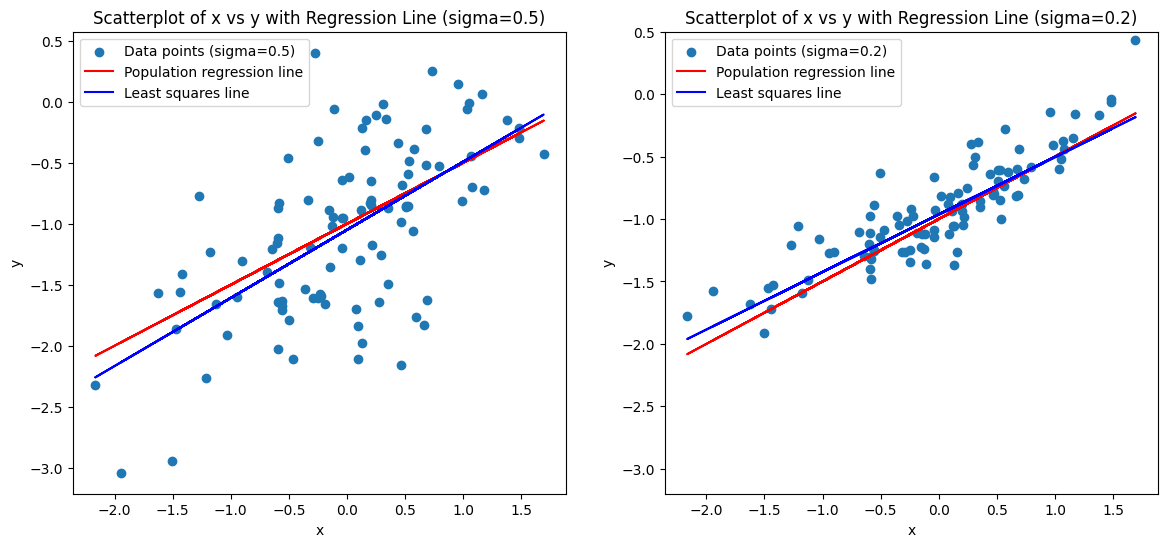

In [ ]:
# (f)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot with old y values (sigma=0.5)
axs[0].scatter(x, y, label='Data points (sigma=0.5)')
axs[0].plot(x, fx, color='red', label='Population regression line')
axs[0].plot(x, model.fittedvalues, color='blue', label='Least squares line')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[0].set_title("Scatterplot of x vs y with Regression Line (sigma=0.5)")
axs[0].legend()

# Second plot with new y values (sigma=0.2)
axs[1].scatter(x, y_less_noise, label='Data points (sigma=0.2)')
axs[1].plot(x, fx, color='red', label='Population regression line')
axs[1].plot(x, model_less_noise.fittedvalues, color='blue', label='Least squares line')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[1].set_title("Scatterplot of x vs y with Regression Line (sigma=0.2)")
axs[1].legend()

plt.show()


**(i)** Repeat **(a)**–**(f)** after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term in **(b)**. Describe your results.

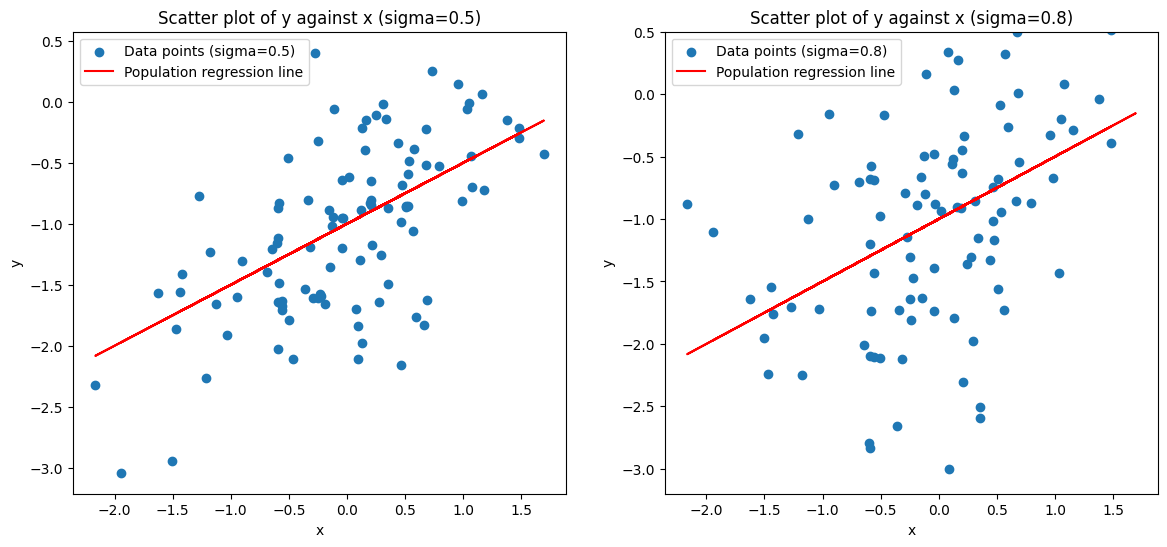

In [56]:
# (a) Generate x with 100 observations from N(0, 1)
# x_new = [random.normalvariate(0, 1) for _ in range(100)]

# (b) Generate eps with 100 observations from N(0, 0.2)
eps_more_noise = [random.normalvariate(0, 0.8) for _ in range(100)]

# (c) Generate y using the model y = -1 + 0.5x + 0.1x^2 + eps
y_more_noise = [-1.0 + 0.5 * x_i + 0.1 * x_i**2 + eps_i for x_i, eps_i in zip(x, eps_more_noise)]

# (d) Plot y against x
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot with old y values (sigma=0.5)
axs[0].scatter(x, y, label='Data points (sigma=0.5)')
axs[0].plot(x, fx, color='red', label='Population regression line')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[0].set_title("Scatter plot of y against x (sigma=0.5)")
axs[0].legend()

# Second plot with new y values (sigma=0.2)
axs[1].scatter(x, y_more_noise, label='Data points (sigma=0.8)')
axs[1].plot(x, fx, color='red', label='Population regression line')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[1].set_title("Scatter plot of y against x (sigma=0.8)")
axs[1].legend()

plt.show()

In [57]:
# (e)
model_more_noise = sm.OLS(y_more_noise, x_with_const)
model_more_noise = model_more_noise.fit()

# Print the summary of the model
print(model_more_noise.summary())

# Extract the coefficients
beta_0_hat_more_noise = model_more_noise.params[0]
beta_1_hat_more_noise = model_more_noise.params[1]

print(f"Estimated coefficients: β0 = {beta_0_hat_more_noise}, β1 = {beta_1_hat_more_noise}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     28.05
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           7.26e-07
Time:                        14:12:17   Log-Likelihood:                -118.28
No. Observations:                 100   AIC:                             240.6
Df Residuals:                      98   BIC:                             245.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9628      0.080    -12.064      0.0

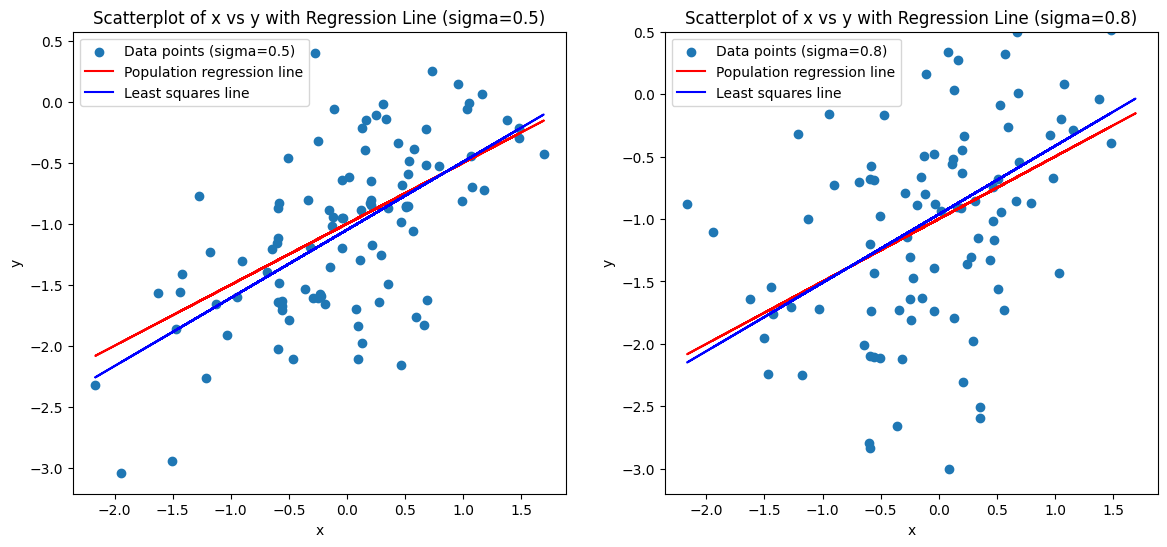

In [58]:
# (f)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot with old y values (sigma=0.5)
axs[0].scatter(x, y, label='Data points (sigma=0.5)')
axs[0].plot(x, fx, color='red', label='Population regression line')
axs[0].plot(x, model.fittedvalues, color='blue', label='Least squares line')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[0].set_title("Scatterplot of x vs y with Regression Line (sigma=0.5)")
axs[0].legend()

# Second plot with new y values (sigma=0.8)
axs[1].scatter(x, y_more_noise, label='Data points (sigma=0.8)')
axs[1].plot(x, fx, color='red', label='Population regression line')
axs[1].plot(x, model_more_noise.fittedvalues, color='blue', label='Least squares line')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_ylim(-3.2, 0.5)
axs[1].set_title("Scatterplot of x vs y with Regression Line (sigma=0.8)")
axs[1].legend()

plt.show()


**(j)** What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [62]:
print("Original data set:")
print("β0 =", beta_0_hat)
print("β1 =", beta_1_hat)

print("\nLess noisy data set:")
print("β0 =", beta_0_hat_less_noise)
print("β1 =", beta_1_hat_less_noise)

print("\nNoisier data set:")
print("β0 =", beta_0_hat_more_noise)
print("β1 =", beta_1_hat_more_noise)

# Confidence intervals for the original data set
conf_int_original = model.conf_int()
print("Confidence intervals for the original data set:")
print(conf_int_original)
# Calculate the width of the confidence intervals for the original data set
conf_int_original_width = conf_int_original[:, 1] - conf_int_original[:, 0]
print("Width of the confidence intervals for the original data set:")
print(conf_int_original_width)

# Confidence intervals for the less noisy data set
conf_int_less_noise = model_less_noise.conf_int()
print("\nConfidence intervals for the less noisy data set:")
print(conf_int_less_noise)
conf_int_less_noise_width = conf_int_less_noise[:, 1] - conf_int_less_noise[:, 0]
print("Width of the confidence intervals for the less noisy data set:")
print(conf_int_less_noise_width)


# Confidence intervals for the noisier data set
conf_int_more_noise = model_more_noise.conf_int()
print("\nConfidence intervals for the noisier data set:")
print(conf_int_more_noise)
conf_int_more_noise_width = conf_int_more_noise[:, 1] - conf_int_more_noise[:, 0]
print("Width of the confidence intervals for the noisier data set:")
print(conf_int_more_noise_width)

Original data set:
β0 = -0.9638718404256477
β1 = 0.4606609366189267

Less noisy data set:
β0 = -0.9638718404256477
β1 = 0.4606609366189267

Noisier data set:
β0 = -0.9627523773203677
β1 = 0.5476674063944789
Confidence intervals for the original data set:
[[-1.15896357 -0.93976294]
 [ 0.41660264  0.70064993]]
Width of the confidence intervals for the original data set:
[0.21920064 0.28404729]

Confidence intervals for the less noisy data set:
[[-1.00601188 -0.9217318 ]
 [ 0.4060545   0.51526737]]
Width of the confidence intervals for the less noisy data set:
[0.08428008 0.10921286]

Confidence intervals for the noisier data set:
[[-1.12111506 -0.8043897 ]
 [ 0.34245591  0.7528789 ]]
Width of the confidence intervals for the noisier data set:
[0.31672536 0.41042299]
